# Comparing K-Fold Cross-Validation Methods: Strategies for Effective Model Evaluation in Diverse Data Scenarios

Sources: 
- Sahel Eskandar, Comparing K-Fold Cross-Validation Methods: Strategies for Effective Model Evaluation in Diverse Data Scenarios, https://medium.com/@eskandar.sahel/comparing-k-fold-cross-validation-methods-strategies-for-effective-model-evaluation-in-diverse-2300b850df3e

- Sahel Eskandar, Evaluating Machine Learning Models: A Guide to Selecting the Right Performance Assessment Method for Your Dataset and Task, https://medium.com/@eskandar.sahel/evaluating-machine-learning-models-a-guide-to-selecting-the-right-performance-assessment-method-a8f61ace557a

- Debarshi Raj Basumatary, Implementing Linear Regression on California Housing Dataset, https://medium.com/@basumatary18/implementing-linear-regression-on-california-housing-dataset-378e14e421b7

- Kiprono Elijah Koech, Cross Validation in Machine Learning, https://towardsdatascience.com/cross-validation-and-bootstrap-sampling-2e041fbec126

- Abhigyan, Cross-Validation Techniques, https://medium.com/geekculture/cross-validation-techniques-33d389897878

- Mehmet Ali TOR, Top 5 Validation Methods In Machine Learning, https://medium.com/@mehmetalitor/top-5-model-validation-methods-in-machine-learning-77eed8d08937

- SangGyu An, Two Resampling Approaches to Assess a Model: Cross-validation and Bootstrap, https://medium.com/codex/two-resampling-approaches-to-assess-a-model-cross-validation-and-bootstrap-794916d37212

## Different types of k-fold cross validation depending on the dataset

- **Regular K-Fold:** General-purpose, works well with balanced datasets
- **Stratified K-Fold:** Preferred for classification problems with imbalanced datasets
- **Time Series K-Fold:** Suitable for time series data
- **Group K-Fold:** Useful when data has logical groupings that need to be considered

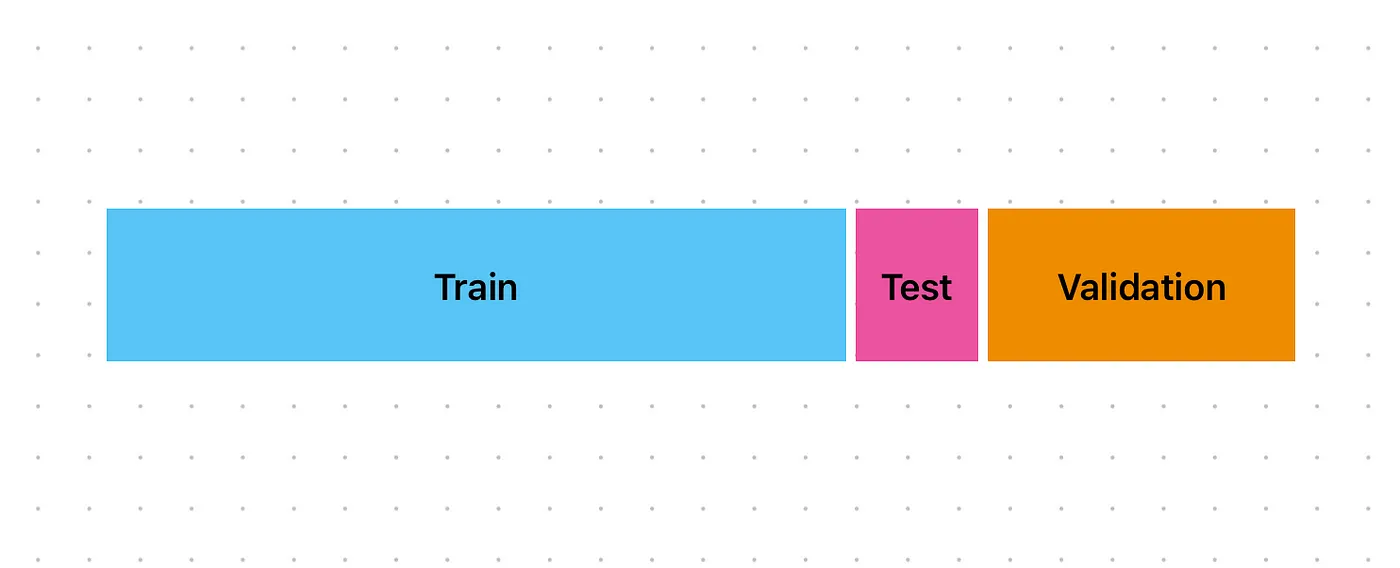

In [1]:
from IPython.display import Image
Image(filename="kfold1.png")

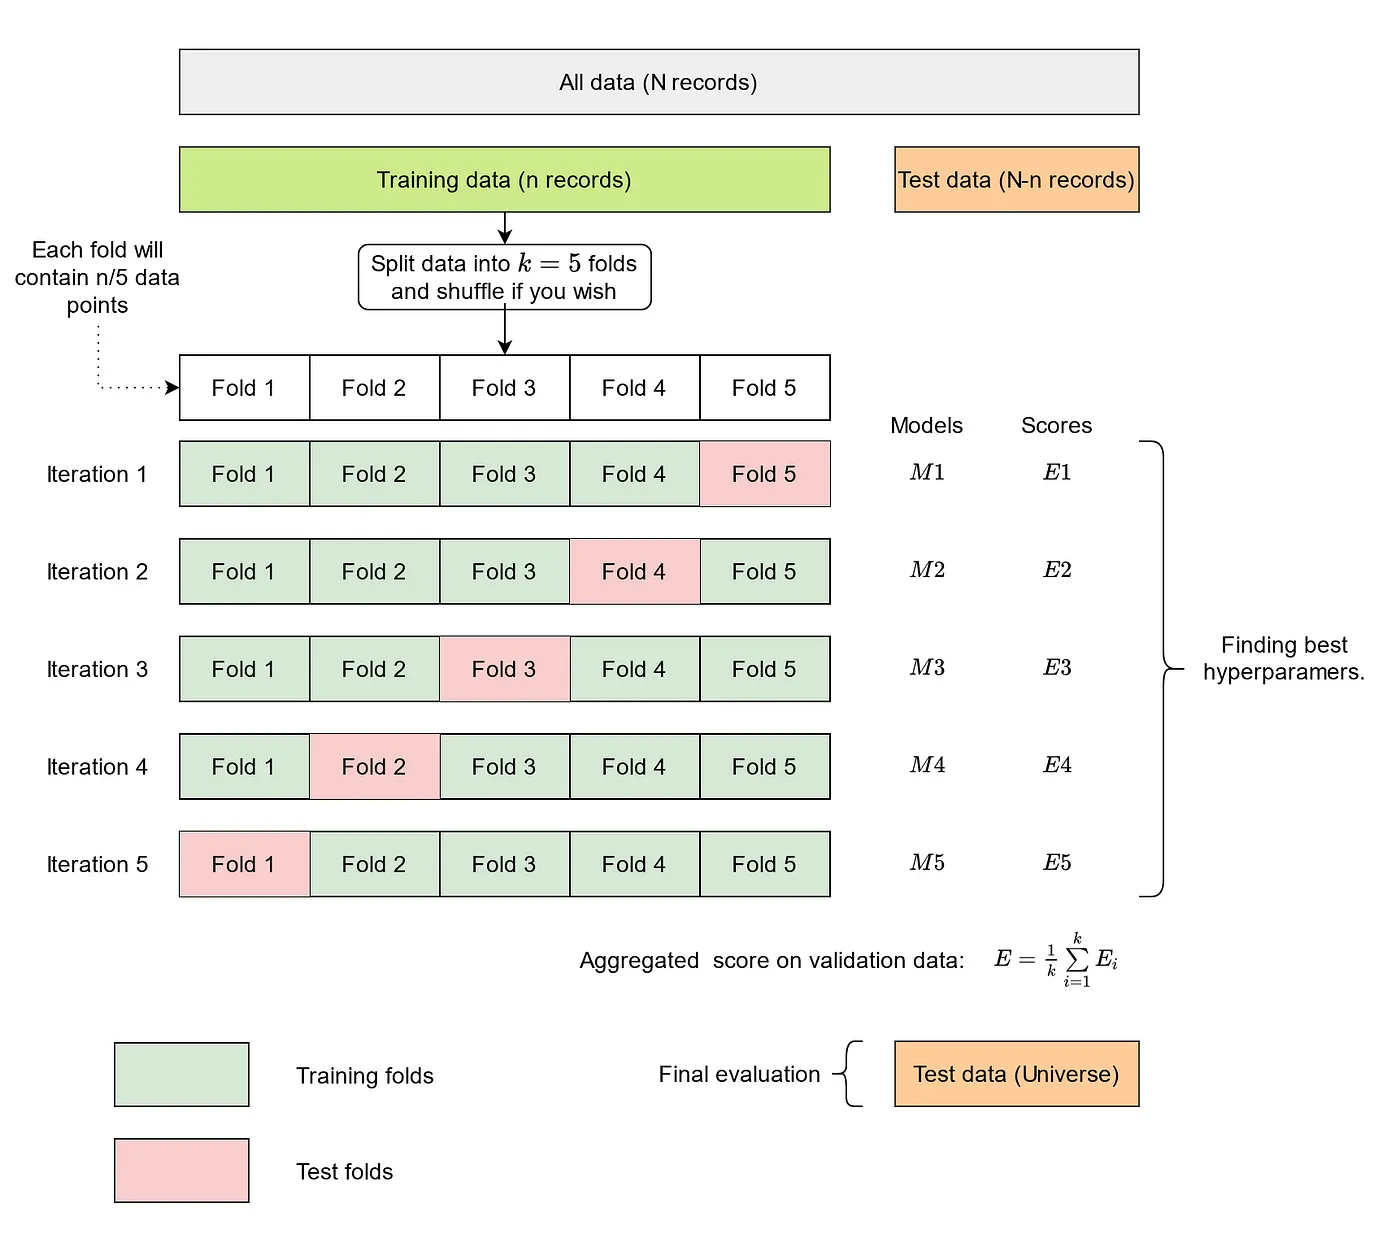

In [2]:
Image(filename="kfold3.png")

**Regular K-Fold Cross-Validation:**
   * Dataset is randomly partitioned into k equal-sized subsets or “folds.” 
   * The model is trained k times, with each fold being used as the testing set once; the remaining k-1 folds being used as the training set. 
   * The performance metrics from each fold are averaged to obtain a final performance estimate for the model. 
   * This method is simple and effective but may not work well when the data distribution is imbalanced or has a skewed class distribution.


**Stratified K-Fold Cross-Validation:**
  * This variation is designed to handle imbalanced datasets or those with a skewed class distribution. 
  * Each fold is made by preserving the same percentage of samples for each class as in the complete dataset
    (each fold has a similar class distribution, leading to more accurate performance estimates). 
  * Stratified k-fold cross-validation is generally preferred when working with imbalanced datasets.


**Time Series K-Fold Cross-Validation:**
  * Time series data has a temporal ordering, and this should be preserved when performing cross-validation.
  * The dataset is split into k folds, maintaining the temporal order of the data. 
  * In each iteration, the model is trained on the first n-1 folds and tested on the nth fold. 
  * Time series k-fold cross-validation prevents data leakage and provides more realistic performance estimates.


**Group K-Fold Cross-Validation:**
  * This method is suitable for datasets where there are logical groupings within the data. 
  * Data points are grouped based on these logical groupings. 
  * The folds are made such that each fold contains data from different groups. 
  * The model is evaluated on data from different groups. This prevents overfitting to any specific group.

#### Necessary libraries:

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit, GroupKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

#### Regular K-Fold Cross-Validation:

In [4]:
# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Apply regular K-Fold cross-validation
kf = KFold(n_splits=5)
accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print("Regular K-Fold accuracies:",  [f"{accuracy:.3f}" for accuracy in accuracies])

Regular K-Fold accuracies: ['1.000', '0.933', '0.433', '0.967', '0.433']


#### Stratified K-Fold Cross-Validation: 

In [5]:
# Apply stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print("Stratified K-Fold accuracies:", [f"{accuracy:.3f}" for accuracy in accuracies])

Stratified K-Fold accuracies: ['1.000', '0.967', '0.933', '0.900', '1.000']


#### Time Series K-Fold Cross-Validation: 

In [6]:
# Load a time series dataset 
# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing(as_frame=True)
# X, y = housing.data, housing.target

# housing = pd.read_csv('/data/IFI8410/sess11/cal_housing.csv')
# X = housing.iloc[:,:-1]
# y = housing.iloc[:,-1]

from sklearn.datasets import fetch_openml

bike_sharing = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
df = bike_sharing.frame

X = df.drop("count", axis="columns")
y = df["count"] / df["count"].max()

categorical_columns = X.columns[X.dtypes == "category"]
print("Categorical features:", categorical_columns.tolist())

X = X.drop(['season', 'holiday', 'workingday', 'weather'], axis="columns")

X = X.to_numpy()
y = y.to_numpy()

# Create a linear regression model
model = LinearRegression()

# Apply time series K-Fold cross-validation
tscv = TimeSeriesSplit(n_splits=5)
mse_values = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

mse_v = [f"{mse_val:.3f}" for mse_val in mse_values]
print("Time Series K-Fold mean squared errors:", mse_v)

/usr/local/lib64/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Categorical features: ['season', 'holiday', 'workingday', 'weather']
Time Series K-Fold mean squared errors: ['0.018', '0.015', '0.030', '0.036', '0.035']


#### Group K-Fold Cross-Validation: 

In [7]:
# Load the Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Define groups based on the assumption that wines are sorted by producers
groups = np.array([i // (len(X) // 5) for i in range(len(X))])

# Apply group K-Fold cross-validation
gkf = GroupKFold(n_splits=5)
accuracies = []

for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print("Group K-Fold accuracies:", [f"{accuracy:.3f}" for accuracy in accuracies])

Group K-Fold accuracies: ['0.974', '0.971', '0.771', '0.971', '0.914']


## Evaluating Machine Learning Models: A Guide to Selecting the Right Performance Assessment Method for Your Dataset and Task

In addition to k-fold cross-validation, there are several other methods for assessing the performance of machine learning models:


**Holdout Method:** 
* The dataset is split into two distinct subsets, one for training and one for testing (usually with a ratio like 70:30 or 80:20). 
* The model is trained on the training set and evaluated on the testing set. 
* This method is simple and fast but may lead to high variance in the performance estimates, especially when the dataset is small. 
* Use the holdout method when you have a large dataset and the evaluation speed is a concern.


**Leave-One-Out Cross-Validation (LOOCV):** 
* This is a special case of k-fold cross-validation where k is equal to the number of data points. 
* In each iteration, one data point is used as the test set, and the remaining data points are used as the training set. 
* This method can provide low-bias performance estimates but is computationally expensive. 
* Use `LOOCV` when you have a small dataset, and the computational cost is not a concern.


**Leave-P-Out Cross-Validation (LPOCV):** 
* A specific number of data points (p) are left out as the test set in each iteration, while the remaining data points are used for training. 
* This method is more computationally expensive than `LOOCV` but provides more reliable performance estimates. 
* Use `LPOCV` when you have a small dataset and you want to balance computational cost with performance estimation accuracy.


**Repeated Random Subsampling (Monte Carlo Cross-Validation):** 
* This method involves randomly splitting the dataset into training, and testing sets multiple times, training the model on the training set, and evaluating it on the testing set. 
* The performance estimates from each split are averaged to provide a final performance estimate. 
* This method can provide more accurate performance estimates for small datasets.
* It can lead to overlapping test sets. 
* Use repeated random subsampling when you have a small dataset and want to balance evaluation speed with performance estimation accuracy.


**Bootstrapping:** 
* This method involves sampling with replacement from the original dataset to create multiple new datasets, each of the same size as the original dataset. 
* The model is trained and evaluated on each new dataset. 
* Bootstrapping can provide more accurate performance estimates for small datasets. 
* It may lead to overfitting due to resampling. 
* Use bootstrapping when you have a small dataset and want to estimate the performance with higher confidence.

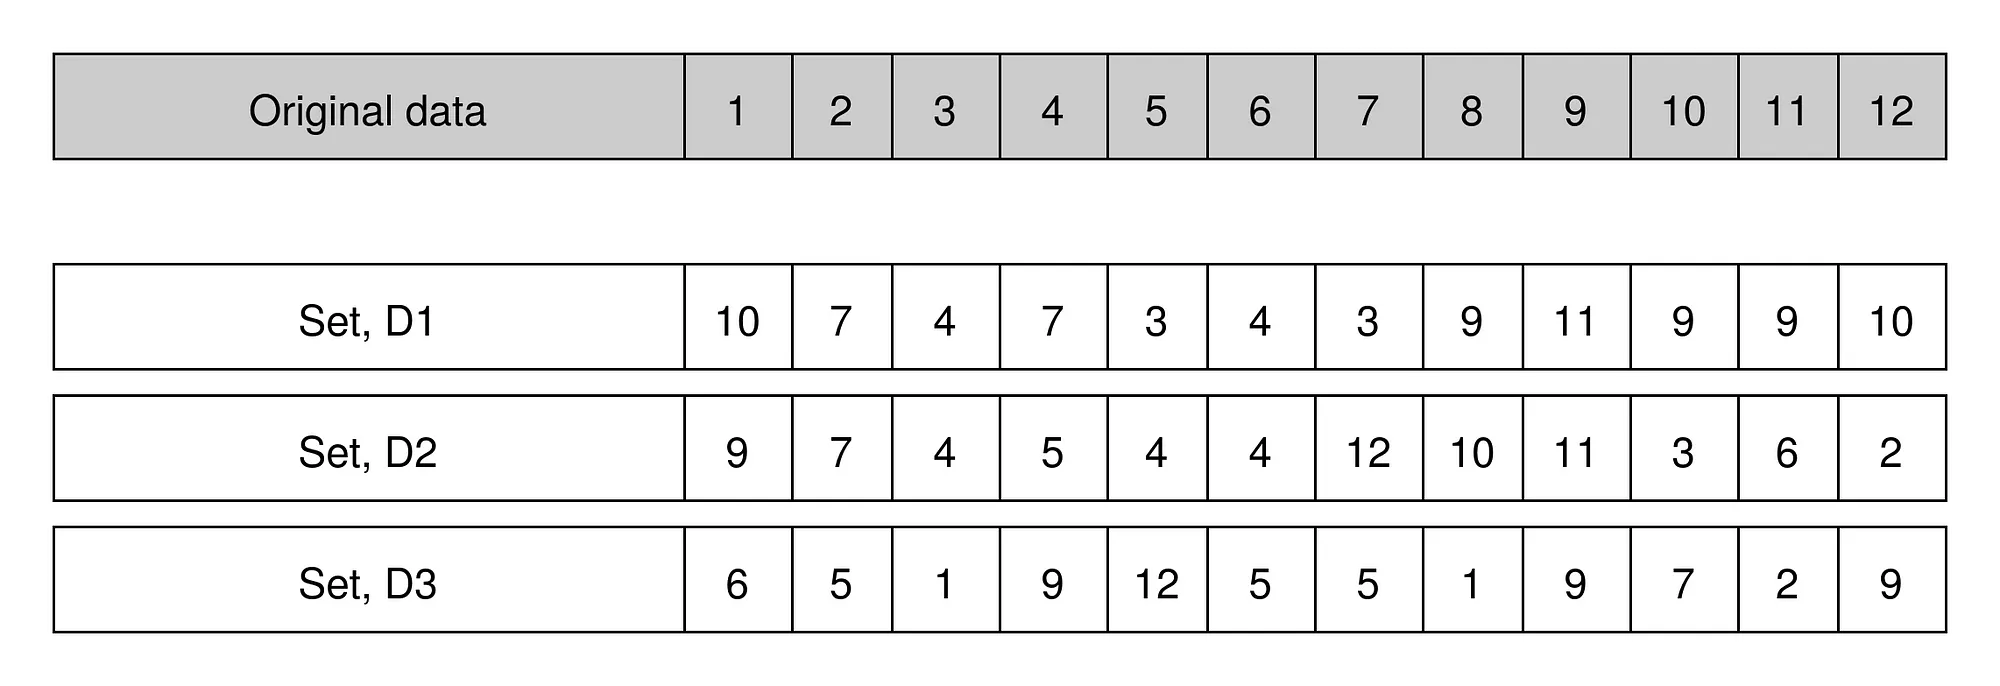

In [8]:
# Bootstrapping
Image(filename="kfold4.png")

In [ ]:
# Leave-one out CV:
Image(filename="kfold7.png")

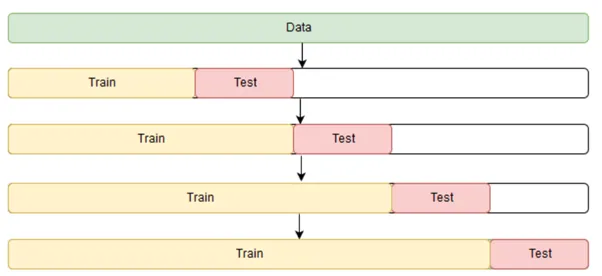

In [10]:
# Time series CV:
Image(filename="kfold5.png")

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, LeavePOut, ShuffleSplit, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Load the iris dataset
data = load_iris()
X, y = data.data, data.target

# Create a logistic regression classifier
clf = LogisticRegression(max_iter=1000)

# Holdout Method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Holdout Method Accuracy: ", accuracy_score(y_test, y_pred))

# K-Fold Cross-Validation
k_fold = KFold(n_splits=5)
cv_scores = cross_val_score(clf, X, y, cv=k_fold)
print("K-Fold Cross-Validation Mean Accuracy: ", np.mean(cv_scores))

# Leave-One-Out Cross-Validation
loocv = LeaveOneOut()
cv_scores = cross_val_score(clf, X, y, cv=loocv)
print("Leave-One-Out Cross-Validation Mean Accuracy: ", np.mean(cv_scores))

# Leave-P-Out Cross-Validation
lpocv = LeavePOut(p=2)
cv_scores = cross_val_score(clf, X, y, cv=lpocv)
print("Leave-P-Out Cross-Validation Mean Accuracy: ", np.mean(cv_scores))

# Repeated Random Subsampling (Monte Carlo Cross-Validation)
ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=ss)
print("Repeated Random Subsampling Mean Accuracy: ", np.mean(cv_scores))

# Bootstrapping
n_iterations = 100
n_size = int(len(X) * 0.7)
bootstrap_scores = []

for i in range(n_iterations):
    X_resample, y_resample = resample(X, y, n_samples=n_size)
    
    # Convert the numpy arrays to lists
    xy = [tuple(row) for row in np.column_stack((X, y))]
    xy_resampled = [tuple(row) for row in np.column_stack((X_resample, y_resample))]
    
    # Find the test set by excluding resampled data points
    test_indices = [i for i, pair in enumerate(xy) if pair not in xy_resampled]
    X_test, y_test = X[test_indices], y[test_indices]
    
    clf.fit(X_resample, y_resample)
    y_pred = clf.predict(X_test)
    bootstrap_scores.append(accuracy_score(y_test, y_pred))
print("Bootstrapping Mean Accuracy: ", np.mean(bootstrap_scores))

Holdout Method Accuracy:  1.0
K-Fold Cross-Validation Mean Accuracy:  0.9266666666666665
Leave-One-Out Cross-Validation Mean Accuracy:  0.9666666666666667
Leave-P-Out Cross-Validation Mean Accuracy:  0.965413870246085
Repeated Random Subsampling Mean Accuracy:  0.96
Bootstrapping Mean Accuracy:  0.9554027466524591
